In [560]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [148]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [149]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [150]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [151]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
X_train
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
len(X_train)
len(y_train)

(353, 10) (353,)
(89, 10) (89,)


353

In [36]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [37]:
predictions[0:5]

array([159.04124859,  66.65014792, 182.24527686, 180.63099397,
       114.53690253])

Text(0, 0.5, 'Predictions')

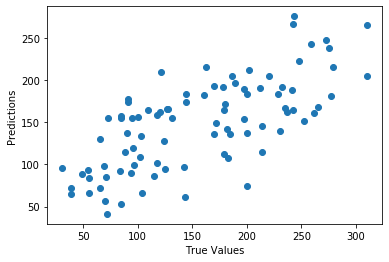

In [38]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [39]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 52.12014334367705
Train RMSE: 54.04947370853495


# Cross Validation

In [51]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [52]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [53]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [56]:
print(X)

[[1 2]
 [3 4]
 [1 2]
 [3 4]]


### LOOCV

In [62]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [63]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [65]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


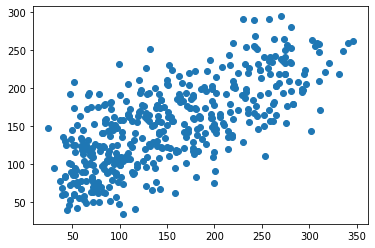

In [71]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [74]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# tasks 

##### Find out cross validation results without using cross_val_predict

In [580]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [581]:
len(y)

442

In [585]:
xTrain, xTest, yTrain, yTest = train_test_split(df, y, test_size=0.252)
print (xTrain.shape, yTrain.shape)
print (xTest.shape, yTest.shape)
len(xTrain)
len(yTrain)
len(xTest)
len(yTest)

(330, 10) (330,)
(112, 10) (112,)


112

In [591]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(xTrain)
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [592]:
cv_rmse =[]

TRAIN: [ 33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277

Test RMSE: 52.374750169968515
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 264 265 266
 267 268 269 2

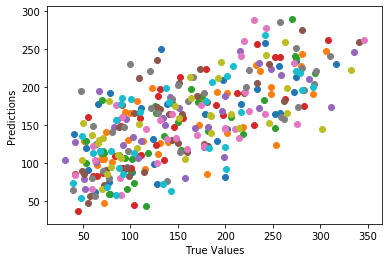

In [593]:
for train_index, test_index in kf.split(xTrain):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = xTrain.iloc[train_index], xTrain.iloc[test_index]    
    y_train, y_test = yTrain[train_index], yTrain[test_index]
    
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    
    plt.scatter(y_test, predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    
    a=np.sqrt(mean_squared_error(predictions, y_test))
    cv_rmse.append(a)
    print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))


In [594]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, X_train, y_train, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.38416477 0.46951936 0.53528594 0.6106994  0.49651145 0.53044857
 0.51313915 0.37213603 0.43523794 0.41924333]


In [595]:
lm = linear_model.LinearRegression()   
gen_model=lm.fit(xTrain,yTrain)
predictions1 = lm.predict(xTest)

print ('Test RMSE:', np.sqrt(mean_squared_error(predictions1, yTest)))
print ('CV Train RMSE:', sum(cv_rmse)/len(cv_rmse))

Test RMSE: 52.701210044718074
CV Train RMSE: 55.43376274748871


##### Implement cross validation without using sklearn at all

In [186]:
#still working on this one....

# Feature Scaling

In [388]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 
y = data['Value']

In [389]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [390]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [391]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [392]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.413793,0.416667,0.355556,0.183673
1,0.517241,0.541667,0.488889,0.224490
2,0.482759,0.541667,0.488889,0.030612
3,0.344828,0.312500,0.244444,0.316327
4,0.413793,0.250000,0.177778,0.204082
...,...,...,...,...
14320,0.379310,0.312500,0.266667,0.775510
14321,0.172414,0.291667,0.466667,0.051020
14322,0.206897,0.437500,0.555556,0.081633
14323,0.241379,0.270833,0.355556,0.224490


In [393]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.344828,0.875000,0.866667,0.091837
1,0.379310,0.375000,0.311111,0.193878
2,0.137931,0.229167,0.377778,0.387755
3,0.517241,0.458333,0.400000,0.153061
4,0.517241,0.541667,0.488889,0.183673
...,...,...,...,...
3577,0.482759,0.500000,0.444444,0.163265
3578,0.379310,0.666667,0.622222,0.173469
3579,0.310345,0.604167,0.666667,0.020408
3580,0.275862,0.395833,0.466667,0.204082


### Standard Scaler

In [394]:
from sklearn.preprocessing import StandardScaler

In [395]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [402]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.614794,-0.036620,-0.871206,-0.040393
1,1.256464,0.832367,0.110391,0.208560
2,1.042574,0.832367,0.110391,-0.973967
3,0.187014,-0.760775,-1.689204,0.768705
4,0.614794,-1.195268,-2.180002,0.084084
...,...,...,...,...
14320,0.400904,-0.760775,-1.525604,3.569428
14321,-0.882437,-0.905606,-0.053208,-0.849491
14322,-0.668546,0.108211,0.601190,-0.662776
14323,-0.454656,-1.050437,-0.871206,0.208560


In [403]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.187014,3.149663,2.891583,-0.600538
1,0.400904,-0.326282,-1.198405,0.021845
2,-1.096327,-1.340099,-0.707607,1.204373
3,1.256464,0.253042,-0.544007,-0.227108
4,1.256464,0.832367,0.110391,-0.040393
...,...,...,...,...
3577,1.042574,0.542704,-0.216808,-0.164870
3578,0.400904,1.701353,1.091988,-0.102631
3579,-0.026876,1.266860,1.419187,-1.036206
3580,-0.240766,-0.181451,-0.053208,0.084084


# tasks

###### try applying this scalers to any dataset and check the regression results

In [555]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
data = pd.read_csv('regression.csv') 
y = data['Value']

In [556]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)


In [557]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [558]:
len(data)

17907

In [561]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
len(X_train), len(X_test)

(14325, 3582)

In [566]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred =lm.predict(X_test)

print('Root mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 4172089.42


In [469]:
#testing the model by applying the scalers
norm = MinMaxScaler().fit(X_train)
scaled_train=pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
scaled_train

,Age,Overall,Potential,Jersey Number
0,0.275862,0.630435,0.695652,0.214286
1,0.103448,0.130435,0.282609,0.551020
2,0.482759,0.891304,0.847826,0.030612
3,0.310345,0.565217,0.608696,0.234694
4,0.379310,0.456522,0.413043,0.010204
...,...,...,...,...
14320,0.275862,0.673913,0.739130,0.112245
14321,0.344828,0.500000,0.500000,0.204082
14322,0.482759,0.391304,0.347826,0.061224
14323,0.413793,0.521739,0.521739,0.122449


In [470]:
scaled_test=pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
scaled_test

,Age,Overall,Potential,Jersey Number
0,0.137931,0.152174,0.391304,0.183673
1,0.241379,0.347826,0.500000,0.163265
2,0.482759,0.543478,0.500000,0.051020
3,0.068966,0.195652,0.521739,0.336735
4,0.586207,0.500000,0.456522,0.020408
...,...,...,...,...
3577,0.620690,0.565217,0.521739,0.122449
3578,0.137931,0.413043,0.695652,0.336735
3579,0.448276,0.739130,0.695652,0.020408
3580,0.103448,0.304348,0.652174,0.153061


In [565]:
regr = linear_model.LinearRegression()
regr.fit(scaled_train, y_train)
y_pred =regr.predict(scaled_test)

print('Root mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 5603765.18


Text(0, 0.5, 'Real Values')

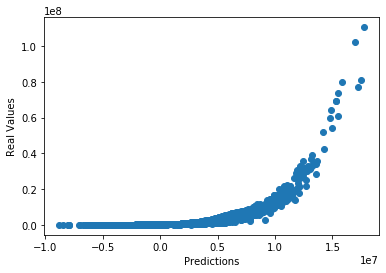

In [474]:
plt.scatter(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Real Values')

# One Hot Encoding

In [597]:
data = pd.read_csv('regression.csv')
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,€1K,CM,22.0,2019,5'9,134lbs
17903,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,€1K,ST,21.0,2020,6'3,170lbs
17904,B. Worman,16,England,47,67,Cambridge United,60000.0,€1K,ST,33.0,2021,5'8,148lbs
17905,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,€1K,RW,34.0,2019,5'10,154lbs


In [334]:
pd.get_dummies(data[['Age', 'Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [483]:
dt = pd.read_csv('regression.csv')

In [484]:
df=pd.get_dummies(data[data.columns.difference(['Name', 'Nationality', 'Value', 'Contract Valid Until', 'Wage', 'Weight'])])
y=dt['Value']
df

,Age,Jersey Number,Overall,Potential,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,31,10.0,94,94,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,33,7.0,94,94,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,10.0,92,93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,1.0,91,93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,7.0,91,92,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,22.0,47,65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,21.0,47,63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17904,16,33.0,47,67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17905,17,34.0,47,66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [485]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
len(X_train), len(X_test)

(14325, 3582)

In [486]:
norm = MinMaxScaler().fit(X_train)
s_train=pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
s_train 

,Age,Jersey Number,Overall,Potential,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,0.241379,0.234694,0.437500,0.553191,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.103448,0.153061,0.437500,0.680851,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.586207,0.051020,0.458333,0.425532,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.241379,0.275510,0.666667,0.744681,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.724138,0.244898,0.312500,0.276596,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14320,0.482759,0.030612,0.395833,0.361702,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14321,0.482759,0.071429,0.437500,0.404255,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14322,0.275862,0.040816,0.437500,0.468085,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14323,0.655172,0.193878,0.375000,0.340426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [487]:
s_test=pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
s_test

,Age,Jersey Number,Overall,Potential,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,0.310345,0.265306,0.520833,0.553191,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.310345,0.071429,0.541667,0.617021,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.344828,0.091837,0.520833,0.510638,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.241379,0.071429,0.416667,0.553191,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.103448,0.316327,0.208333,0.553191,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0.379310,0.244898,0.416667,0.446809,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3578,0.379310,0.051020,0.375000,0.404255,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3579,0.206897,0.285714,0.562500,0.702128,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3580,0.103448,0.377551,0.229167,0.510638,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [488]:
regr = linear_model.LinearRegression()
regr.fit(s_train, y_train)
y_pred =regr.predict(s_test)

print('Root mean squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 3205577.34


Text(0, 0.5, 'Real Values')

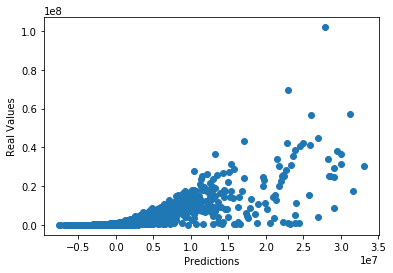

In [492]:
plt.scatter(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Real Values')